In [64]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from mstda import FeatureSpace
import pandas as pd
from colour import Color

def make_monotone_map(dd):
    keys = sorted( list(dd))
    return { k : idx for idx,k in enumerate(keys) }

In [65]:
df = pd.read_csv("data/Drugbank_some_descriptors.csv")
#descriptor = "Lipinski;lipinski_violations"
descriptor = "Polarizability"
descriptor = "OEselma Descriptors;npsa"
descriptor = "OEselma Descriptors;aromatic_ring_count"
#descriptor = "ACD Descriptors;logP"
#descriptor = "Mol Weight"
#descriptor = "RAScore;RAscore"
descriptor = "Polarizability"
print(descriptor, "NaN values:", len([v for v in df[descriptor].isna() if v]))

OEselma Descriptors;aromatic_ring_count NaN values: 17


In [66]:
select = df[descriptor].dropna()
mm = make_monotone_map(pd.unique( select ))
values = select.map(mm)
print({k:v for i,(k,v) in enumerate(mm.items()) if i < 5 },"...", ({k:v for i,(k,v) in enumerate(mm.items()) if i > len(mm.items())-5}))
print(values)

{0.0: 0, 1.0: 1, 2.0: 2, 3.0: 3, 4.0: 4} ... {6.0: 6, 7.0: 7, 8.0: 8, 10.0: 9}
0        3
1        4
2        8
3        2
4        5
        ..
10627    4
10628    3
10629    0
10630    3
10631    3
Name: OEselma Descriptors;aromatic_ring_count, Length: 10615, dtype: int64


In [67]:
#fs = FeatureSpace("data/Drugbank2019_MS_CFMID4.0.json")


In [68]:
len(fs.molecules)

9701

In [69]:
colors = list(map(
    Color.get_rgb,
    Color("blue").range_to(Color("red"), len(mm))
))
df_smiles = list(df["SMILES"])
idxs = np.asarray(
    [[fs.molecules.index(m),idx] for m in fs.molecules if (idx := df_smiles.index(m)) in values.index ]
)
print(idxs[:10])
features = fs.features[idxs[:,0],:]
values = values[idxs[:,1]]
colormap = np.asarray([ colors[i] for i in values ])

[[    0  1969]
 [    1  9057]
 [    2 10592]
 [    3  4342]
 [    4  8772]
 [    5   184]
 [    6  2386]
 [    7  5099]
 [    8  2120]
 [    9  9132]]


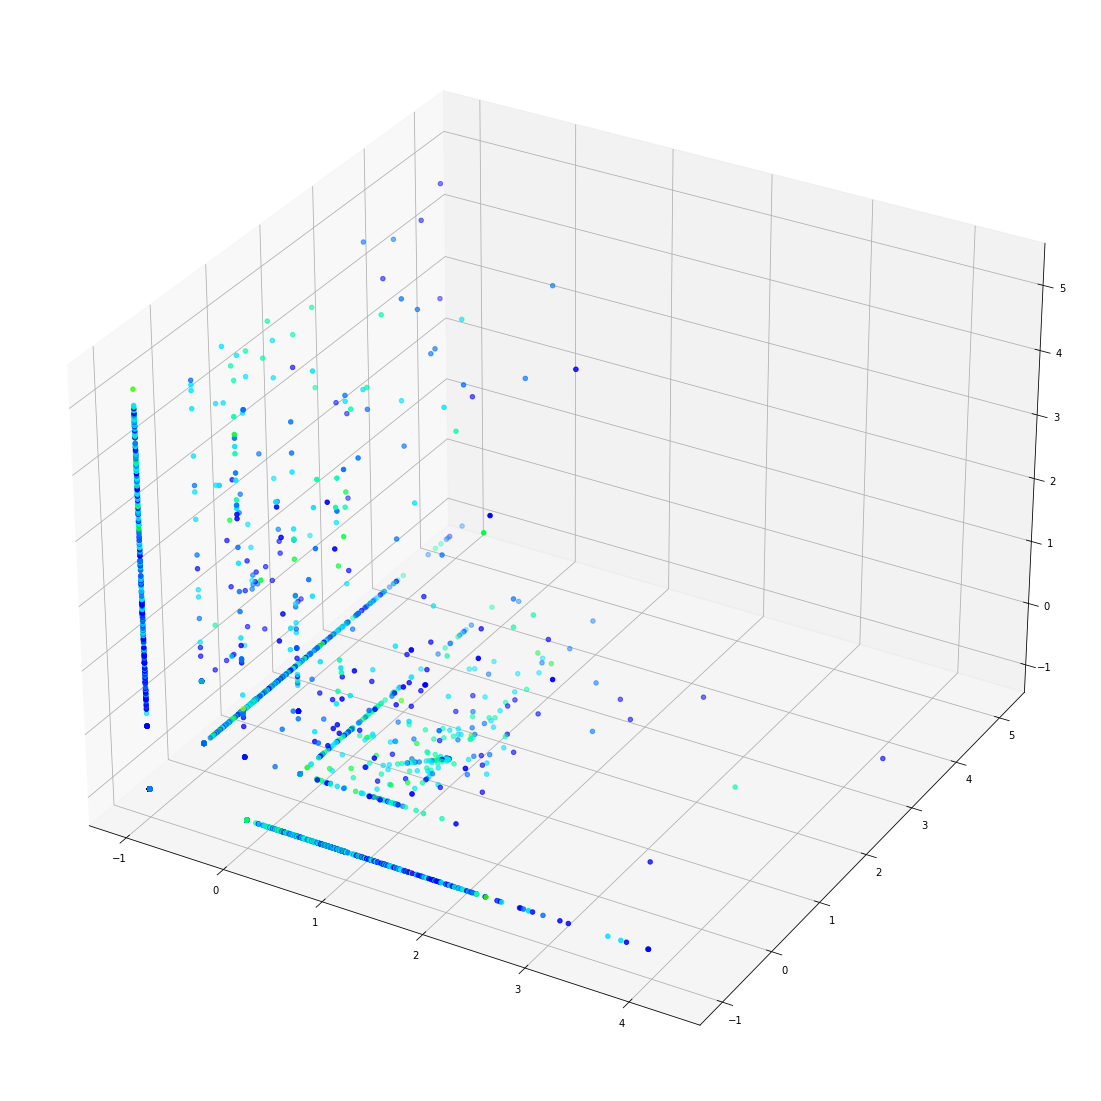

In [75]:
%matplotlib inline
# homology 0
fig = plt.figure(figsize=(20,20))
ax = fig.add_subplot(1, 1, 1, projection='3d')
# 012 345 678
ax.scatter(features[:,2],features[:,5],features[:,8], c = colormap)